# Linear Regression

### Importing packages

In [33]:
import pandas as pd
import seaborn as sns

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import statsmodels

In [16]:
from scipy.stats import iqr

In [17]:
import matplotlib as plt

### Loading Dataset

In [18]:
data = pd.read_csv('salary.csv')

In [19]:
data.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [20]:
data.isna().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

### Cleaning data

In [21]:
data =data.drop_duplicates()

In [22]:
data['salary'].fillna(data['salary'].mean(),inplace=True)

*Replacing the null value in salary with mean value*

### Correlation of features

In [12]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1,0.119946,0.623135,0.61058,0.407208,0.0445522,0.167129,0.701354,0.361447,-0.498485,-0.0696218
exprior,0.119946,1,-0.246549,-0.066403,-0.0350411,-0.0493727,0.264804,0.116596,0.0465577,-0.0483155,0.13238
yearsworked,0.623135,-0.246549,1,0.813471,-0.0708964,0.028421,-0.04049,0.746736,0.278963,-0.261379,0.0554682
yearsrank,0.61058,-0.066403,0.813471,1,-0.0269746,0.00651583,0.0070362,0.48521,0.237787,-0.263953,0.0356316
market,0.407208,-0.0350411,-0.0708964,-0.0269746,1,0.036408,0.0216917,-0.0133578,0.181201,-0.223827,-0.167068
degree,0.0445522,-0.0493727,0.028421,0.00651583,0.036408,1,-0.214717,0.0436796,0.061611,-0.0984242,0.0293106
otherqual,0.167129,0.264804,-0.04049,0.0070362,0.0216917,-0.214717,1,0.160311,0.0158332,-0.0766229,-0.0176389
position,0.701354,0.116596,0.746736,0.48521,-0.0133578,0.0436796,0.160311,1,0.318129,-0.288812,0.0297514
male,0.361447,0.0465577,0.278963,0.237787,0.181201,0.061611,0.0158332,0.318129,1,-0.128874,-0.622179
Field,-0.498485,-0.0483155,-0.261379,-0.263953,-0.223827,-0.0984242,-0.0766229,-0.288812,-0.128874,1,-0.000126793


*The highest correlation with regards to salary is position followed by yearsworked.*

### Splitting Data

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

#### Let’s split this data into labels and features.

In [25]:
y = data.salary
x = data

#### Then, we split the data.

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [27]:
x_train.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
436,32000.0,7,0,0,0.78,1,0,1,0,3,0
92,55406.0,0,10,3,1.23,1,0,2,1,1,1
29,39000.0,4,0,0,1.22,1,0,1,1,4,0
275,73669.0,0,23,14,1.19,1,0,3,1,1,1
438,36869.0,0,7,1,0.85,1,0,2,0,1,4


### Examining the training data

#### unique values

In [28]:
x_train.shape

(359, 11)

*The data has been examined at the beginning.There are no missing and null values in the training data set. The training data has 70% of the total Data set*

#### extreme values

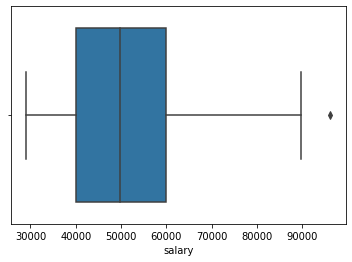

In [136]:
sns.boxplot(x_train['salary'])

*The boxplot above shows that there is one extreme value of salary in the training data set.*
*With that known, one can choose to remedy the outlier because it may cause the outlier can skew the results*

*The outlier is on the further right which is most likely to be on the 99 percentile.*

In [65]:
Q3 = x_train["salary"].quantile(0.9999999)

In [66]:
x_train[(x_train["salary"] > Q3)]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
280,91405.0,0,23,14,1.18,1,0,3,1,1,0


### The scatter plot showing the relationship between salaries and years worked

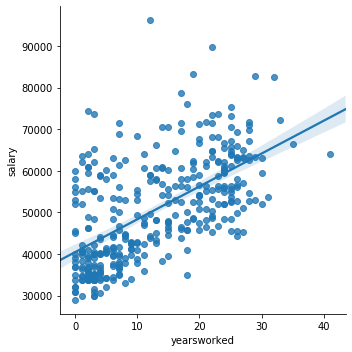

In [135]:
sns.lmplot(x='yearsworked',y='salary',data=x_train)

*There is a positive relationship between years worked and salaries earned.*

In [67]:
plt.hist(x_train.salary)

AttributeError: module 'matplotlib' has no attribute 'hist'

In [79]:
IQR =Q3 -Q1

In [85]:
a=Q1 - (1.5*IQR)

In [86]:
a

8916.5

In [87]:
b=Q3 +(1.5*IQR)

In [88]:
df = x_train.query('salary > a & salary < b')

UndefinedVariableError: name 'a' is not defined

In [141]:
x_train[x_train['salary'] > b]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs


In [140]:
x_train[x_train['salary'] <a]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs


*Using the statsmodels package and the training data, 
run a simple linear regression for Salary with one predictor variable: Years Worked.*

In [90]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

In [91]:
mod = sm.OLS(x_train.yearsworked, x_train.salary)

res = mod.fit()

In [92]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            yearsworked   R-squared (uncentered):                   0.775
Model:                            OLS   Adj. R-squared (uncentered):              0.774
Method:                 Least Squares   F-statistic:                              1234.
Date:                Mon, 03 Feb 2020   Prob (F-statistic):                   4.76e-118
Time:                        12:23:04   Log-Likelihood:                         -1237.8
No. Observations:                 359   AIC:                                      2478.
Df Residuals:                     358   BIC:                                      2482.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
salary         0.0003   7.66e-06     35.128      0.000       0.000       0.000
==============================================================================
Omnibus:                       48.674   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.312
Skew:                           0.090   Prob(JB):                      0.00129
Kurtosis:                       2.074   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Report the amount of variance explained (R^2) and significance value (p)

*The R-squared = 0.746. It reveals that that about 74% of the data fit the regression model.*


*The P-value can indicate how incompatible the data are with the specified model.* 
*The null hypothesis :*
**There is no relation between the years worked and salary earned.**
*The P-value = 4.759733e-118. P-value < 0.05 and by that the null hypothesis can be rejected.*


#### Does the model significantly predict the dependent variable? 


*For this model there is high R-square and low p-value.*
*It means the model explains a lot of variation within the data and is significant*

In [94]:
res.pvalues

salary    4.759733e-118
dtype: float64

In [ ]:
res.co

#### What do the 95% confidence intervals [0.025, 0.975] mean?

*A 95% confidence interval is a range of values that you can be 95% certain
that it contains the true mean of the population.*
*Idealy, with regards to this interval :[0.025, 0.975],the true population should be on this interval.*
*The Central Limit theorem states  that the mean of a large sample
is approximately equal to the true population mean.*
*The mean in this case is 0.0003.According to these results 
the assumed salary is not within a 95% confidence interval for the mean.*

#### Expected salary for someone with 12 years’ work experience.

#### The expected salary for someone with 80 years’ work experience.

#### Are there any problems with this prediction? If so, what are they?

#### We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?